In [1]:
! pip install semantic-kernel


StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 3, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 114.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 128.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 kB 156.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.3/83.3 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 177.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 26.6 MB/s eta 0:00:00
  Attempting uninsta

In [2]:
# import os
# import sys
# import json
import pandas as pd



StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 4, Finished, Available)

In [3]:

import semantic_kernel as sk
from semantic_kernel.connectors.ai.open_ai import AzureChatCompletion

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 5, Finished, Available)

In [4]:
kernel = sk.Kernel()

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 6, Finished, Available)

In [5]:
deployment = 'Your Azure OpenAI Service GPT-4 Deployment Name'
api_key = 'Your Azure OpenAI Service API Key'
endpoint = 'Your Azure OpenAI Service Endpoint' 

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 7, Finished, Available)

In [6]:
kernel.add_chat_service("chat", AzureChatCompletion(deployment, endpoint, api_key))

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 8, Finished, Available)

In [7]:
base_skills_directory = '/lakehouse/default/Files/skills'

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 9, Finished, Available)

In [8]:
skills = {
    **kernel.import_semantic_skill_from_directory(base_skills_directory , "dataskill"),
}

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 10, Finished, Available)

In [9]:
df = pd.read_csv("/lakehouse/default/Files/csv/ProductList.csv")

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 11, Finished, Available)

In [10]:
context_variables = sk.ContextVariables(variables={
    "question": "Generate a bar chart to list Product Type and display the number of products owned by the corresponding Product Type"
})

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 12, Finished, Available)

In [11]:
csv_skill = skills["csv"]
pysql_skill = skills["spark"]
sql_skill = skills["sql"]

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 13, Finished, Available)

In [12]:
result = await csv_skill.invoke_async(variables=context_variables)

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 14, Finished, Available)

In [13]:
result.result

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 15, Finished, Available)

"import matplotlib.pyplot as plt\n\nproduct_type_counts = df['Product Type'].value_counts();\nproduct_type_counts.plot(kind='bar');\nplt.xlabel('Product Type');\nplt.ylabel('Number of Products');\nplt.title('Number of Products per Product Type');\nplt.xticks(rotation=270);\nplt.show();"

In [14]:
sql = result.result.replace("\\n","").replace("\\n\\n", "")

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 16, Finished, Available)

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 17, Finished, Available)

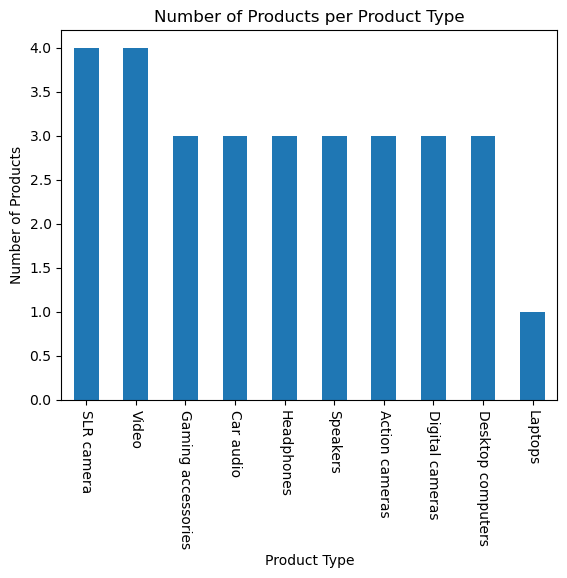

In [15]:
exec(sql)

In [16]:
context_variables = sk.ContextVariables(variables={
    "question": "Find Product Type belonging to Car audio and display them as table "
})

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 18, Finished, Available)

In [17]:
result = await csv_skill.invoke_async(variables=context_variables)

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 19, Finished, Available)

In [18]:
exec(result.result)

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 20, Finished, Available)

             Title   Code Name Product Line Product Type         Color  Notes
3   Car Audio 1000  CARAud1000        Audio    Car audio  Chrome/Black    NaN
12  Car Audio 2000  CARAud2000        Audio    Car audio  Chrome/Black    NaN
19  Car Audio 2500  CARAud2500        Audio    Car audio  Chrome/Black    NaN


In [19]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 21, Finished, Available)

In [20]:
df = spark.read.load('Files/csv/sales.csv',
    format='csv',
    header=True
)
display(df.limit(10))

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 22, Finished, Available)

SynapseWidget(Synapse.DataFrame, e935434b-8a3a-4e01-8002-7b6442f79ce4)

In [31]:
sparksql_context_variables = sk.ContextVariables(variables={
    "question": "Search OrderDate on '2019-07-01' and counts SalesOrderLineNumber"
})

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 33, Finished, Available)

In [32]:
sparksql_result = await pysql_skill.invoke_async(variables=sparksql_context_variables)

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 34, Finished, Available)

In [33]:
sparksql_result.result

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 35, Finished, Available)

"df_filtered = df.filter(df.OrderDate == '2019-07-01');\nsales_order_count = df_filtered.groupBy('SalesOrderLineNumber').count();\ndisplay(sales_order_count);"

In [34]:
sparksql = sparksql_result.result.replace("\n","")

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 36, Finished, Available)

In [35]:
sparksql

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 37, Finished, Available)

"df_filtered = df.filter(df.OrderDate == '2019-07-01');sales_order_count = df_filtered.groupBy('SalesOrderLineNumber').count();display(sales_order_count);"

In [36]:
exec(sparksql)

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 38, Finished, Available)

SynapseWidget(Synapse.DataFrame, a84160c4-9f9c-4f66-8340-361f2a5de2e6)

In [37]:
sql_context_variables = sk.ContextVariables(variables={
    "datasource": "mydatasource",
    "question": "Count the total Quantity of the Item column in Sales for Road-150 Red, 44"
})

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 39, Finished, Available)

In [38]:
sql_result = await sql_skill.invoke_async(variables=sql_context_variables)

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 40, Finished, Available)

In [39]:
sql_result.result.replace("\n"," ")

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 41, Finished, Available)

"SELECT SUM(Quantity)  FROM mydatasource.Sales WHERE Item = 'Road-150 Red, 44';"

In [40]:
%%sql

SELECT SUM(Quantity)  FROM mydatasource.Sales  WHERE Item = 'Road-150 Red, 44'

StatementMeta(, 1c82cac3-48a4-4d96-a9a3-f6d5c7b56c4a, 42, Finished, Available)

<Spark SQL result set with 1 rows and 1 fields>